# Evaluación Python

<b>Apellidos: </b> < Florido Reyes ><br>
<b>Nombre: </b> < Alejandro ><br>


__Ejercicio 1__

Usando un bucle, escribe un programa que imprima una a una todas las palabras de una cadena hasta que encuentre la palabra 'STOP'.

_Pista: investiga el uso de la función [split()](https://www.w3schools.com/python/ref_string_split.asp)_

_1 punto_

In [1]:
texto = 'Este examen me va a ir genial STOP de locos'

In [2]:
l_palabras = texto.split(' ')
l_palabras

['Este', 'examen', 'me', 'va', 'a', 'ir', 'genial', 'STOP', 'de', 'locos']

In [3]:
def stopit(s):
    
    l_palabras = s.split(' ')
    
    i = 0
    
    while l_palabras[i] != 'STOP':
        print(l_palabras[i])
        i += 1

In [4]:
stopit(texto) # Comprobación. # La función es para un texto separado por espacios, como el del ejemplo; esto es, no tiene que 
# ser general ¿no?

Este
examen
me
va
a
ir
genial


__Ejercicio 2__

Escribe una función `años_perrunos(edad_perro)` que reciba como input un número y devuelva la edad del perro en años humanos.
* La función debe devolver 0 si el número introducido es menor que cero
* Para un perro, los dos primeros años valen 11 años humanos, a partir de ahí, cada año perruno suma 4 años humanos a la edad del perro.
Ejemplo: 
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>edad del perro</th><th>años humanos</th></tr></thead><tbody>
 <tr><td>0</td><td>0</td></tr>
 <tr><td>1</td><td>11</td></tr>
 <tr><td>2</td><td>22</td></tr>
 <tr><td>3</td><td>26</td></tr>
 <tr><td>4</td><td>30</td></tr>
</tbody></table>


Controla las excepciones (si es necesario) para que si el input no es el esperado devuelva None.

Prueba a pasarle los siguientes inputs: 1, -2, 4, 8, 'six'

_1 punto_

In [5]:
# Tu código aquí

def años_perrunos(edad_perro):
    try:
        edad_humana = 0

        if edad_perro <= 0:
            return(0)
        else:
            for i in range(1,edad_perro+1):
                if i <= 2:                     # El = lo he añadido yo para que el código sea más legible (si no, aunque no pasa
                    edad_humana += 11          # realmente, *parece* que si edad_perro = 0, el bucle podría hacer cosas raras, 
                else:                          # aunque en realidad no las hace.
                    edad_humana += 4
            return(edad_humana)     
    except Exception:
        return(None)
        
    

In [6]:
print(años_perrunos(0))

0


In [7]:
print(años_perrunos(1))
print(años_perrunos(4))
print(años_perrunos(8))
print(años_perrunos(-2))
print(años_perrunos('six'))

11
30
46
0
None


__Ejercicio 3__

Sobre la matriz `A`, calcula la suma de los elementos las columnas pares (considerando que la primera columna es la 0, que es par).

_1 punto_

In [8]:
import numpy as np

In [9]:
A = np.array([[1, 2, 3, 9, 8, 1, 2, 3, 9, 8], [4, 5, 6, 9, 8, 4, 5, 6, 9, 8], [2, 2, 2, 9, 8, 1, 2, 3, 9, 8]])
A

array([[1, 2, 3, 9, 8, 1, 2, 3, 9, 8],
       [4, 5, 6, 9, 8, 4, 5, 6, 9, 8],
       [2, 2, 2, 9, 8, 1, 2, 3, 9, 8]])

In [10]:
A[:,::2].sum() # La suma total, no por columnas ¿no? Igual que ayer.

78

__Ejercicio 4__

A partir del dataframe dado, genera los siguientes gráficos con seaborn:
* Un [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) con la distribución de edad de los hombres y mujeres. Separa a su vez en distintos boxplot los supervivientes de los no supervivientes.

<i>Parecido a esto:</i>

<img src="https://seaborn.pydata.org/_images/seaborn-boxplot-9.png" alt="pista"/>
    
* Usa una paleta de colores que no sea la que viene por defecto
* Ponle un título representativo a cada gráfico.


_1 punto_

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [12]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'Distribuciones de edad según sexo y supervivencia')

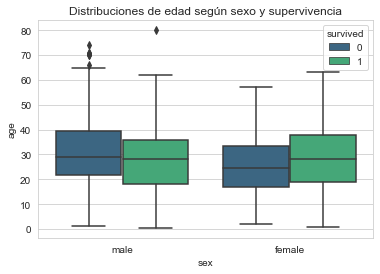

In [13]:
# Un boxplot con la distribución de edad de los hombres y mujeres. Separa a su vez en distintos boxplot los supervivientes de
# los no supervivientes.

sns.boxplot(x = 'sex', y = 'age', hue = 'survived', palette = 'viridis', data = titanic)
plt.title('Distribuciones de edad según sexo y supervivencia')

__Ejercicio 6__

Genera una lista con los nombres de las camisetas de esta página: https://www.qwertee.com/shop

_2 puntos_

In [14]:
# No olvides hacer los imports pertinentes

In [15]:
import requests
from bs4 import BeautifulSoup 

In [16]:
url = 'https://www.qwertee.com/shop'
page = requests.get(url)
page.status_code # Verificamos que nos han dado acceso (200).

200

In [17]:
cont = page.content
soup = BeautifulSoup(cont, 'html.parser')
soup # Paso a examinar la web.

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Shop Qwertees | Qwertee : Limited Edition Cheap Daily T Shirts | Gone in 24 Hours | T-shirt Only £9/€11/$12 | Cool Graphic Funny Tee Shirts</title>
<meta content="Qwertee.com sells a new cool, funny, graphic t shirt every 24 hours for only £9/€11/$12! Get your limited edition tee now before its too late!" name="Description">
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="1050828616" property="fb:admins">
<meta content="Qwerty T Shirts, Qwerty, Qwertee, Graphic Tees, cool shirts, awesome t shirts, cheap graphic tees, tee shirts, limited edition tshirts, limited edition tee shirts, cool graphic tees, cool graphic t-shirts, mens, boys girls Tshirts kids Tees, womens, ladies, funny, cool, music, printed, graphic, designer, humor, unique, t-shirts, tee shirts, tshirts, clothing, design, art, Irish T-Shirts, Irish T-Shirt, retro, band, art, cotton t shirt, Ir

In [18]:
# Tras haberla examinado:
names = soup.find_all('a', class_='name')
names # comprobamos que solo nos está devolviendo nombres de camisetas (no hay otras cosas con la misma clase a priori).

## Solo me está devolviendo 20 nombres de todos los que aparecen en la página, eso es raro. REV.

[<a class="name" href="/product/penguin-ice-christmas">Penguin ice christmas</a>,
 <a class="name" href="/product/sleep-until-next-christmas">Sleep until next Christmas!</a>,
 <a class="name" href="/product/pokeimpostors">POKEIMPOSTORS</a>,
 <a class="name" href="/product/you-ll-always-have-me">You'll Always Have Me</a>,
 <a class="name" href="/product/wear-your-mask">Wear your Mask</a>,
 <a class="name" href="/product/digital-courage-within">Digital Courage Within</a>,
 <a class="name" href="/product/digital-friendship-within">Digi Friendship Within</a>,
 <a class="name" href="/product/i-am-morales">I am Morales</a>,
 <a class="name" href="/product/the-snow-queen-995">The Snow Queen</a>,
 <a class="name" href="/product/morning-panda">Morning Panda</a>,
 <a class="name" href="/product/sunset-wave">Sunset Wave</a>,
 <a class="name" href="/product/iron-mando-the-hunter">Iron Mando The Hunter</a>,
 <a class="name" href="/product/colorful-cat">Colourful Cat</a>,
 <a class="name" href="/pro

In [19]:
name_list = list() # Creo la lista vacía que contendrá los nombres de las camisetas.

for element in names:
    name_list.append(element.get_text())

name_list # Mostramos la lista con los nombres.

['Penguin ice christmas',
 'Sleep until next Christmas!',
 'POKEIMPOSTORS',
 "You'll Always Have Me",
 'Wear your Mask',
 'Digital Courage Within',
 'Digi Friendship Within',
 'I am Morales',
 'The Snow Queen',
 'Morning Panda',
 'Sunset Wave',
 'Iron Mando The Hunter',
 'Colourful Cat',
 'Colourful Wolf',
 'Ghost Type Season!',
 'Chemical Dice',
 'owl mail of leaves',
 'Evolutions',
 'Never Forget',
 '2020 one star review']

__Ejercicio 7__

En este ejercicio se te dan datos de la incidencia del coronavirus en las provincias de España. Tu objetivo es generar un gráfico en el que se representen los nuevos casos diarios para algunas comunidades autónomas.

_5 puntos_

In [20]:
import pandas as pd

* Lee los datos de [`datos_provincias.csv`](https://cnecovid.isciii.es/covid19/resources/datos_provincias.csv)
* Parsea la columna fecha para que sea tipo [`datetime`](https://www.geeksforgeeks.org/python-pandas-to_datetime/) _Esta línea te viene dada, no debes modificarla_

In [21]:
url = 'https://cnecovid.isciii.es/covid19/resources/datos_provincias.csv'

df_prov = pd.read_csv(url) # He comprobado que el documento estaba separado por comas (opción por defecto para csv's y esta
                           # función) y si tenía nombres en el encabezado (no tan relevante en principio, pero bueno).
    
df_prov['fecha'] = pd.to_datetime(df_prov['fecha'],format='%Y-%m-%d')
df_prov.head() # He comprobado que el DataFrame mostrado se corresponde, a priori, con el de la url (descargándolo y abriéndolo).

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,A,2020-01-01,0,0,0,0,0
1,AB,2020-01-01,0,0,0,0,0
2,AL,2020-01-01,0,0,0,0,0
3,AV,2020-01-01,0,0,0,0,0
4,B,2020-01-01,1,1,0,0,0


In [22]:
df_prov.dtypes # Comprobamos que la transformación a fecha se ha realizado adecuadamente.

provincia_iso                           object
fecha                           datetime64[ns]
num_casos                                int64
num_casos_prueba_pcr                     int64
num_casos_prueba_test_ac                 int64
num_casos_prueba_otras                   int64
num_casos_prueba_desconocida             int64
dtype: object

* Comprueba el número de filas, columnas del dataframe
* Comprueba cuántos valores vacíos hay en cada columna del dataframe.

In [23]:
df_prov.shape # 18252 filas, 7 columnas.

(18252, 7)

In [24]:
df_prov.isna().sum() # 351 para la primera, 0 para el resto de columnas.

provincia_iso                   351
fecha                             0
num_casos                         0
num_casos_prueba_pcr              0
num_casos_prueba_test_ac          0
num_casos_prueba_otras            0
num_casos_prueba_desconocida      0
dtype: int64

* Comprueba el tipo de cada columna

In [25]:
df_prov.dtypes

provincia_iso                           object
fecha                           datetime64[ns]
num_casos                                int64
num_casos_prueba_pcr                     int64
num_casos_prueba_test_ac                 int64
num_casos_prueba_otras                   int64
num_casos_prueba_desconocida             int64
dtype: object

* Añade al dataframe una columna que represente la comunidad autónoma. Aquí tienes un diccionario para ayudarte.
* Examina qué filas se quedan sin comunidad autónoma.

In [26]:
dict_prov_com = {'AL':'AN','CA':'AN','CO':'AN','GR':'AN','H':'AN','J':'AN','MA':'AN',
                 'SE':'AN','HU':'AR','TE':'AR','Z':'AR','O':'AS','S':'CB','AV':'CL',
                 'BU':'CL','LE':'CL','P':'CL','SA':'CL','SG':'CL','SO':'CL','VA':'CL',
                 'ZA':'CL','AB':'CM','CR':'CM','CU':'CM','GU':'CM','TO':'CM','GC':'CN',
                 'TF':'CN','B':'CT','GI':'CT','L':'CT','T':'CT','BA':'EX','CC':'EX','C':'GA',
                 'LU':'GA','OR':'GA','PO':'GA','PM':'IB','MU':'MC','M':'MD','NA':'NC','VI':'PV',
                 'BI':'PV','SS':'PV','LO':'RI','A':'VC','CS':'VC','V':'VC'}
dict_df = pd.DataFrame(list(dict_prov_com.items()), columns=['provincia', 'CCAA'])

df_prov = df_prov.merge(dict_df, left_on = 'provincia_iso', right_on='provincia', how = 'left')
df_prov # Comprobación.


,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,provincia,CCAA
0,A,2020-01-01,0,0,0,0,0,A,VC
1,AB,2020-01-01,0,0,0,0,0,AB,CM
2,AL,2020-01-01,0,0,0,0,0,AL,AN
3,AV,2020-01-01,0,0,0,0,0,AV,CL
4,B,2020-01-01,1,1,0,0,0,B,CT
...,...,...,...,...,...,...,...,...,...
18247,V,2020-12-16,0,0,0,0,0,V,VC
18248,VA,2020-12-16,0,0,0,0,0,VA,CL
18249,VI,2020-12-16,0,0,0,0,0,VI,PV
18250,Z,2020-12-16,0,0,0,0,0,Z,AR


In [27]:

df_prov.isna().sum() ## Me salen más NA's que en provincia_iso. REV.

provincia_iso                    351
fecha                              0
num_casos                          0
num_casos_prueba_pcr               0
num_casos_prueba_test_ac           0
num_casos_prueba_otras             0
num_casos_prueba_desconocida       0
provincia                       1053
CCAA                            1053
dtype: int64

In [28]:
df_prov[df_prov.isna()]

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,provincia,CCAA
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18247,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18248,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18249,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18250,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Algunos registros se han quedado sin comunidad.
* Elimina de `df_prov` los registros de los que no sepamos la provincia
* Incluye en el diccionario los códigos de ceuta y melilla (el código de la provincia y el de comunidad son el mismo)
* Genera la columna `comunidad` usando el diccionario actualizado
* Comprueba que en el dataframe final tengamos los códigos de todas las comunidades. Comprueba que cada provincia tiene su comunidad.
* Comprueba la nueva longitud del dataframe

In [29]:
df_prov = df_prov.dropna(subset=['provincia_iso'])
df_prov.isna().sum() # Comprobamos que hemos quitado los na's.

provincia_iso                     0
fecha                             0
num_casos                         0
num_casos_prueba_pcr              0
num_casos_prueba_test_ac          0
num_casos_prueba_otras            0
num_casos_prueba_desconocida      0
provincia                       702
CCAA                            702
dtype: int64

In [30]:
dict_prov_com['CE'] = 'CE'
dict_prov_com['ME'] = 'ME'


In [31]:
dict_df_b = pd.DataFrame(list(dict_prov_com.items()), columns=['provincia', 'comunidad'])
df_prov = df_prov.merge(dict_df_b, left_on = 'provincia_iso', right_on='provincia', how = 'left')

df_prov.isna().sum() 

provincia_iso                     0
fecha                             0
num_casos                         0
num_casos_prueba_pcr              0
num_casos_prueba_test_ac          0
num_casos_prueba_otras            0
num_casos_prueba_desconocida      0
provincia_x                     702
CCAA                            702
provincia_y                       0
comunidad                         0
dtype: int64

In [32]:
list(dict_prov_com.items())

[('AL', 'AN'),
 ('CA', 'AN'),
 ('CO', 'AN'),
 ('GR', 'AN'),
 ('H', 'AN'),
 ('J', 'AN'),
 ('MA', 'AN'),
 ('SE', 'AN'),
 ('HU', 'AR'),
 ('TE', 'AR'),
 ('Z', 'AR'),
 ('O', 'AS'),
 ('S', 'CB'),
 ('AV', 'CL'),
 ('BU', 'CL'),
 ('LE', 'CL'),
 ('P', 'CL'),
 ('SA', 'CL'),
 ('SG', 'CL'),
 ('SO', 'CL'),
 ('VA', 'CL'),
 ('ZA', 'CL'),
 ('AB', 'CM'),
 ('CR', 'CM'),
 ('CU', 'CM'),
 ('GU', 'CM'),
 ('TO', 'CM'),
 ('GC', 'CN'),
 ('TF', 'CN'),
 ('B', 'CT'),
 ('GI', 'CT'),
 ('L', 'CT'),
 ('T', 'CT'),
 ('BA', 'EX'),
 ('CC', 'EX'),
 ('C', 'GA'),
 ('LU', 'GA'),
 ('OR', 'GA'),
 ('PO', 'GA'),
 ('PM', 'IB'),
 ('MU', 'MC'),
 ('M', 'MD'),
 ('NA', 'NC'),
 ('VI', 'PV'),
 ('BI', 'PV'),
 ('SS', 'PV'),
 ('LO', 'RI'),
 ('A', 'VC'),
 ('CS', 'VC'),
 ('V', 'VC'),
 ('CE', 'CE'),
 ('ME', 'ME')]

In [33]:
# Para comprobar que están los códigos de todas las comunidades:
#a =pd.DataFrame(df_prov.groupby(df_prov['comunidad']))
#len(a) == len(list(dict_prov_com)) # REV

df_prov['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ME', 'MU', 'O', 'OR', 'P',
       'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T', 'TE', 'TF',
       'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [34]:
dict_prov_com.keys() # Creo que están todos.

dict_keys(['AL', 'CA', 'CO', 'GR', 'H', 'J', 'MA', 'SE', 'HU', 'TE', 'Z', 'O', 'S', 'AV', 'BU', 'LE', 'P', 'SA', 'SG', 'SO', 'VA', 'ZA', 'AB', 'CR', 'CU', 'GU', 'TO', 'GC', 'TF', 'B', 'GI', 'L', 'T', 'BA', 'CC', 'C', 'LU', 'OR', 'PO', 'PM', 'MU', 'M', 'NA', 'VI', 'BI', 'SS', 'LO', 'A', 'CS', 'V', 'CE', 'ME'])

In [35]:
len(df_prov) # Longitud comprobada.

17901

* Elimina del dataframe las columnas num_casos_prueba_pcr, num_casos_prueba_test_ac, num_casos_prueba_otras, num_casos_prueba_desconocida

* Agrega el dataframe para tener el número de casos diarios para cada comunidad autónoma. _No sobreescribas `df_prov`, guarda el resultado de la agregación en un nuevo dataframe_

In [36]:
df_prov = df_prov.drop(['num_casos_prueba_pcr', 'num_casos_prueba_test_ac', 'num_casos_prueba_otras', 'num_casos_prueba_desconocida'], axis=1)
df_prov

,provincia_iso,fecha,num_casos,provincia_x,CCAA,provincia_y,comunidad
0,A,2020-01-01,0,A,VC,A,VC
1,AB,2020-01-01,0,AB,CM,AB,CM
2,AL,2020-01-01,0,AL,AN,AL,AN
3,AV,2020-01-01,0,AV,CL,AV,CL
4,B,2020-01-01,1,B,CT,B,CT
...,...,...,...,...,...,...,...
17896,V,2020-12-16,0,V,VC,V,VC
17897,VA,2020-12-16,0,VA,CL,VA,CL
17898,VI,2020-12-16,0,VI,PV,VI,PV
17899,Z,2020-12-16,0,Z,AR,Z,AR


In [37]:
df_prov_b = df_prov.groupby(['fecha', 'comunidad']).sum().reset_index()
df_prov_b

,fecha,comunidad,num_casos
0,2020-01-01,AN,0
1,2020-01-01,AR,0
2,2020-01-01,AS,0
3,2020-01-01,CB,0
4,2020-01-01,CE,0
...,...,...,...
6313,2020-12-16,MD,0
6314,2020-12-16,ME,0
6315,2020-12-16,PV,1
6316,2020-12-16,RI,0


* Ordena el nuevo dataframe por fecha (de más antiguo a más reciente) y comunidad autónoma (alfabéticamente).

A partir de ahora trabajaremos con este dataframe de comunidades.

In [38]:
df_prov_b.sort_values('fecha',ascending=True)

,fecha,comunidad,num_casos
0,2020-01-01,AN,0
17,2020-01-01,VC,1
16,2020-01-01,RI,0
15,2020-01-01,PV,0
14,2020-01-01,ME,0
...,...,...,...
6301,2020-12-16,AR,0
6300,2020-12-16,AN,0
6316,2020-12-16,RI,0
6307,2020-12-16,CN,0


<span style="color:red">RESCATE: Atención, **si NO has conseguido agregar los datos de las comunidades**, carga el dataframe de [esta 
url](https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv) y :</span>
* <span style="color:red">Elimina las columnas num_casos_prueba_pcr, num_casos_prueba_test_ac, num_casos_prueba_otras, num_casos_prueba_desconocida</span>
* <span style="color:red">Continúa el ejercicio</span>

Estamos casi preparados para hacer una gráfica con los datos, pero los nombres de las comunidades aún son poco descriptivos. 
* *Parsea* el html `tabla_comunidades.html` y genera un dataframe con los códigos y nombres de las comunidades.
    * Puedes poner los nombres de las columnas a mano
* Cruza este nuevo dataframe con el anterior para tener los nombres de las comunidades en el dataframe (modifica el dataframe parseado como sea necesario para que cruce)

In [39]:
from bs4 import BeautifulSoup

with open('tabla_comunidades.html') as f:
    soup = BeautifulSoup(f, 'html.parser')

In [40]:
col = soup.find('thead').find_all('th')

col_names = []

for elemento in col:
    col_names.append(elemento.get_text())
    
col_names

['Codigo', 'Comunidad o ciudad autonoma']

In [41]:
fil = soup.find('tbody').find_all('tr')

row_name = []

for row in fil:
    row_elements = []
    for element in row.find_all('td'):
        row_elements.append(element.get_text())
    row_name.append(row_elements)
row_name

[['ES-AN', 'Andalucia'],
 ['ES-AR', 'Aragon'],
 ['ES-AS', 'Asturias, Principado de'],
 ['ES-CN', 'Canarias'],
 ['ES-CB', 'Cantabria'],
 ['ES-CM', 'Castilla-La Mancha'],
 ['ES-CL', 'Castilla y Leon'],
 ['ES-CT', 'Catalunya'],
 ['ES-EX', 'Extremadura'],
 ['ES-GA', 'Galicia'],
 ['ES-IB', 'Illes Balears'],
 ['ES-RI', 'La Rioja'],
 ['ES-MD', 'Madrid, Comunidad de'],
 ['ES-MC', 'Murcia, Region de'],
 ['ES-NC', 'Navarra, Comunidad Foral de'],
 ['ES-PV', 'Pais Vasco/Euskadi'],
 ['ES-VC', 'Valenciana, Comunidad'],
 ['ES-CE', 'Ceuta'],
 ['ES-ME', 'Melilla']]

In [42]:
new_df = pd.DataFrame(row_name,columns = col_names)
new_df

,Codigo,Comunidad o ciudad autonoma
0,ES-AN,Andalucia
1,ES-AR,Aragon
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria
5,ES-CM,Castilla-La Mancha
6,ES-CL,Castilla y Leon
7,ES-CT,Catalunya
8,ES-EX,Extremadura
9,ES-GA,Galicia


In [43]:
new_df['Codigo'] = new_df.apply(lambda row: row['Codigo'].replace('ES-',''), axis = 1)

df_prov = df_prov.merge(new_df, left_on='comunidad', right_on='Codigo', how = 'inner')
df_prov

,provincia_iso,fecha,num_casos,provincia_x,CCAA,provincia_y,comunidad,Codigo,Comunidad o ciudad autonoma
0,A,2020-01-01,0,A,VC,A,VC,VC,"Valenciana, Comunidad"
1,CS,2020-01-01,1,CS,VC,CS,VC,VC,"Valenciana, Comunidad"
2,V,2020-01-01,0,V,VC,V,VC,VC,"Valenciana, Comunidad"
3,A,2020-01-02,0,A,VC,A,VC,VC,"Valenciana, Comunidad"
4,CS,2020-01-02,0,CS,VC,CS,VC,VC,"Valenciana, Comunidad"
...,...,...,...,...,...,...,...,...,...
17896,S,2020-12-12,80,S,CB,S,CB,CB,Cantabria
17897,S,2020-12-13,10,S,CB,S,CB,CB,Cantabria
17898,S,2020-12-14,7,S,CB,S,CB,CB,Cantabria
17899,S,2020-12-15,0,S,CB,S,CB,CB,Cantabria


<span style="color:red">Si has utilizado el dataframe de "rescate" no tendrás nombre de comunidad en Melilla. No pasa nada, seguimos</span>

* Utiliza seaborn para pintar el número de casos por fecha desde el 1 de enero de 2020 para Madrid, Andalucía y Cataluña.
    * Debes utilizar un lineplot en el que las fechas aparezcan ordenadas
    * Los colores correspondientes a las líneas de cada comunidad autónoma deben aparecer en la leyenda
    * En la leyenda no deben aparecer el códigos de las comunidades, sino sus nombres.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df_prov[df_prov['Comunidad o ciudad autonoma']== 'Madrid, Comunidad de']

,provincia_iso,fecha,num_casos,provincia_x,CCAA,provincia_y,comunidad,Codigo,Comunidad o ciudad autonoma
15795,M,2020-01-01,2,M,MD,M,MD,MD,"Madrid, Comunidad de"
15796,M,2020-01-02,0,M,MD,M,MD,MD,"Madrid, Comunidad de"
15797,M,2020-01-03,0,M,MD,M,MD,MD,"Madrid, Comunidad de"
15798,M,2020-01-04,0,M,MD,M,MD,MD,"Madrid, Comunidad de"
15799,M,2020-01-05,0,M,MD,M,MD,MD,"Madrid, Comunidad de"
...,...,...,...,...,...,...,...,...,...
16141,M,2020-12-12,601,M,MD,M,MD,MD,"Madrid, Comunidad de"
16142,M,2020-12-13,434,M,MD,M,MD,MD,"Madrid, Comunidad de"
16143,M,2020-12-14,947,M,MD,M,MD,MD,"Madrid, Comunidad de"
16144,M,2020-12-15,1546,M,MD,M,MD,MD,"Madrid, Comunidad de"


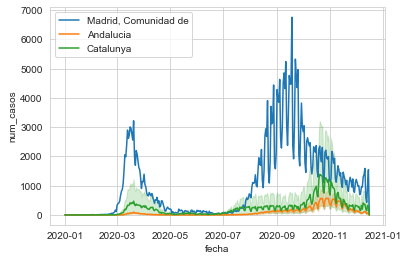

In [46]:
sns.lineplot(x = 'fecha', y = 'num_casos',data = df_prov[df_prov['Comunidad o ciudad autonoma']== 'Madrid, Comunidad de'], label = 'Madrid, Comunidad de')
sns.lineplot(x = 'fecha', y = 'num_casos',data = df_prov[df_prov['Comunidad o ciudad autonoma']== 'Andalucia'], label = 'Andalucia')
sns.lineplot(x = 'fecha', y = 'num_casos',data = df_prov[df_prov['Comunidad o ciudad autonoma']== 'Catalunya'], label = 'Catalunya')


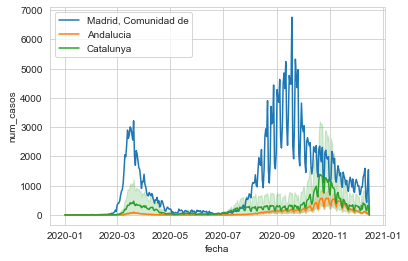

In [48]:
lista = ['Madrid, Comunidad de', 'Andalucia', 'Catalunya']

for element in lista:
    sns.lineplot(x = 'fecha', y = 'num_casos',data = df_prov[df_prov['Comunidad o ciudad autonoma']== element], label = element)
                             